In [20]:
import pymupdf4llm
import os

import fitz  # PyMuPDF
from pymupdf4llm.helpers.pymupdf_rag import to_markdown

import pdfplumber  # 用來讀取與擷取 PDF 中的表格內容
import pandas as pd  # 將表格資料轉成 DataFrame 以方便後續格式化成 Markdown

import re


Tool = "PyMuPDF4LLM"
file_name = "20250728_人權政策"

pdf_path = "..\永續資料_與中信有關\政策與文件\\" + file_name + ".pdf"
output_path = "PDF_To_Markdown_OutputFile\\" + Tool + "\\markdown\\"
final_output_path = "PDF_To_Markdown_OutputFile\\" + Tool + "\\markdown\\final\\"
img_save_path = "PDF_To_Markdown_OutputFile\\" + Tool + "\\img\\"

## 練習各種工具

### pymupdf4llm 基礎指令，將 PDF 檔轉 Markdown

In [3]:
md_text = pymupdf4llm.to_markdown(pdf_path)

with open(markdown_save_path + file_name + "_test1.md", "w", encoding="utf-8") as f:
    f.write(md_text)

### pymupdf4llm 的 LlamaMarkdownReader

In [64]:
from pymupdf4llm import LlamaMarkdownReader

reader = LlamaMarkdownReader()
documents = reader.load_data(
    file_path = pdf_path
)

# print(f"共有 {len(documents)} 頁")


# for i, doc in enumerate(documents):
#     file_path = os.path.join(save_path, f"page_{i+1}.md")
#     with open(file_path, "w", encoding="utf-8") as f:
#         f.write(f"# Page {i+1}\n\n") 
#         f.write(doc.text)

# for i, doc in enumerate(documents[:2]):
#     print(f"\n--- Page {i+1} ---")
#     print(doc.text[:300])

### fitz 擷取 pdf 內容

In [ ]:
doc = fitz.open(pdf_path)
print(f"共有 {len(doc)} 頁")

共有 4 頁


In [6]:
page = doc[2]  # 第一頁（index 從 0 開始）
text = page.get_text()
print(text)

文件等級：公開 
3 
 
 
 
中國信託金融控股股份有限公司 
永續金融政策 
第一條 制定依據及目的 
中國信託金融控股（股）公司（以下稱「中信金控」或「本公司」）為
追求業務成長並落實聯合國永續發展目標（SDGs），承諾遵循國際永續
金融倡議及主管機關相關政策，透過集團核心業務積極發揮對於全球
永續發展的正向影響力（ positive impact ）， 以提升金融包容性
（financial inclusiveness）並驅動低碳經濟（low-carbon economy）等發
展，朝向2050淨零目標邁進。爰依中信金控永續管理政策，訂定中信金
控永續金融政策（以下稱「本政策」），以資遵循。 
第二條   適用範圍 
本政策適用於本公司及各子公司。 
第三條 實施原則 
本政策實施原則如下： 
一、積極響應並提倡永續金融 
即時追蹤、掌握國際永續金融倡議及主管機關永續相關政策發展趨
勢。在確保業務、資源等各面向可行的前提之下，本公司 / 或業務相
關子公司應率先公開響應。 
二、聚焦於創造 SDGs 及氣候環境相關之正向影響力 
呼應 SDGs，本公司之永續金融作為除整體考量業務對象或標的之
產品、服務、營運的 ESG 風險、是否具爭議性外，應評估與SDGs 
氣候、森林及水、生物多樣性、人權等面向連結之風險與機會，並
發揮正向影響力，以有效促成永續發展。 
三、驅動低碳經濟，邁向2050淨零排放 
為達成本公司 SBT減量目標及2050淨零排放，應持續發展綠色金融
商品及服務，並積極與客戶進行議合，協助客戶進行低碳轉型。在
業務發展的過程中，應持續關注公司投融資業務對於造成之影響，
積極進行相關風險與機會之評估。 



In [97]:
blocks = page.get_text("blocks")  # 回傳 list，每個元素為 (x0, y0, x1, y1, text, block_no)

for b in blocks[:10]:
    print(f"文字區塊位置：({b[0]}, {b[1]}) ~ ({b[2]}, {b[3]})")
    print(f"內容類型：{type(b[4])}，字數：{len(b[4])}，內容：{b[4]}")


文字區塊位置：(431.5, 70.86200714111328) ~ (502.96002197265625, 80.82200622558594)
內容類型：<class 'str'>，字數：9，內容：文件等級：公開 

文字區塊位置：(295.2699890136719, 769.6856079101562) ~ (302.67999267578125, 780.7113647460938)
內容類型：<class 'str'>，字數：3，內容：3 

文字區塊位置：(84.02400207519531, 34.644309997558594) ~ (89.0040054321289, 44.604312896728516)
內容類型：<class 'str'>，字數：2，內容： 

文字區塊位置：(84.02400207519531, 770.9642944335938) ~ (89.0040054321289, 780.92431640625)
內容類型：<class 'str'>，字數：2，內容： 

文字區塊位置：(297.7900085449219, 92.08436584472656) ~ (302.8000183105469, 114.26864624023438)
內容類型：<class 'str'>，字數：2，內容： 

文字區塊位置：(157.5800018310547, 123.40431213378906) ~ (442.9900207519531, 145.58859252929688)
內容類型：<class 'str'>，字數：16，內容：中國信託金融控股股份有限公司 

文字區塊位置：(237.77000427246094, 149.08436584472656) ~ (362.9200134277344, 171.26864624023438)
內容類型：<class 'str'>，字數：8，內容：永續金融政策 

文字區塊位置：(90.02400207519531, 185.28797912597656) ~ (225.1699981689453, 198.5719757080078)
內容類型：<class 'str'>，字數：13，內容：第一條 制定依據及目的 

文字區塊位置：(138.02000427246094, 

### 查看 dict 工具讀取的內容

In [45]:
page = doc[1]  # 第一頁（index 從 0 開始）
text_dict = page.get_text("dict")
text_dict

{'width': 595.5599975585938,
 'height': 842.0399780273438,
 'blocks': [{'number': 0,
   'type': 1,
   'bbox': (90.0, 42.549964904785156, 236.38999938964844, 85.89996337890625),
   'width': 536,
   'height': 161,
   'ext': 'jpeg',
   'colorspace': 3,
   'xres': 96,
   'yres': 96,
   'bpc': 8,
   'transform': (146.38999938964844,
    0.0,
    -0.0,
    43.349998474121094,
    90.0,
    42.549964904785156),
   'size': 15854,
   'image': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x00\xa1\x02\x18\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc

### 遍歷字體

In [8]:
fonts_set = set()

for page in doc:
	text_dict = page.get_text("dict")
	for block in text_dict["blocks"]:
		if "lines" not in block:
			continue
		for line in block["lines"]:
			for span in line["spans"]:
				font_name = span.get("font", "")
				fonts_set.add(font_name)

print("出現過的字體種類：")
for font in sorted(fonts_set):
    print(font)
    
    
# DFKaiShu-SB-Estd-BF 大標 副標 項目   8
# SimSun 空白                         4
# TimesNewRomanPS-BoldMT 空白         20
# TimesNewRomanPSMT 英文 數字         4

出現過的字體種類：
DFKaiShu-SB-Estd-BF
SimSun
TimesNewRomanPS-BoldMT
TimesNewRomanPSMT


### 印出單一字體內容

In [9]:
target_font = "dfkaishu-sb-estd-bf"

print(f"字體為 {target_font} 的內文：\n")

for page in doc:
    text_dict = page.get_text("dict")

    for block in text_dict["blocks"]:
        if "lines" not in block:
            continue
        for line in block["lines"]:
            for span in line["spans"]:
                font_name = span.get("font", "").lower()
                text = span.get("text", "").strip()
                if font_name == target_font and text:
                    print(text)



字體為 dfkaishu-sb-estd-bf 的內文：

文件等級：公開
中國信託金融控股股份有限公司
永續金融政策
版本
中國信託金融控股
股
公司
著作權聲明
本文件所載之各項著作內容皆屬中國信託金融控股(股)公司所有，皆受到中
華民國著作權法的保護，未經書面同意不得以任何形式修改、複製及轉載。
文件等級：公開
文件制
修訂履歷
制
修訂
版次
制
修訂
日期
制
修訂
說明
作
者
備
註
政策制定
企業永續
辦公室
增、修訂集團淨零目標及實施原則等條文
企業永續部
文件等級：公開
中國信託金融控股股份有限公司
永續金融政策
第一條
制定依據及目的
中國信託金融控股（股）公司（以下稱「中信金控」或「本公司」）為
追求業務成長並落實聯合國永續發展目標（
），承諾遵循國際永續
金融倡議及主管機關相關政策，透過集團核心業務積極發揮對於全球
永續發展的正向影響力（
），
以提升金融包容性
（
）並驅動低碳經濟（
）等發
展，朝向
淨零目標邁進。爰依中信金控永續管理政策，訂定中信金
控永續金融政策（以下稱「本政策」），以資遵循。
第二條
適用範圍
本政策適用於本公司及各子公司。
第三條
實施原則
本政策實施原則如下：
一、積極響應並提倡永續金融
即時追蹤、掌握國際永續金融倡議及主管機關永續相關政策發展趨
勢。在確保業務、資源等各面向可行的前提之下，本公司
或業務相
關子公司應率先公開響應。
二、聚焦於創造
及氣候環境相關之正向影響力
呼應
，本公司之永續金融作為除整體考量業務對象或標的之
產品、服務、營運的
風險、是否具爭議性外，應評估與
氣候、森林及水、生物多樣性、人權等面向連結之風險與機會，並
發揮正向影響力，以有效促成永續發展。
三、驅動低碳經濟，邁向
淨零排放
為達成本公司
減量目標及
淨零排放，應持續發展綠色金融
商品及服務，並積極與客戶進行議合，協助客戶進行低碳轉型。在
業務發展的過程中，應持續關注公司投融資業務對於造成之影響，
積極進行相關風險與機會之評估。
文件等級：公開
四、整合集團資源，擴大業務綜效
各子公司除因應業務特性，個別訂定納入前述
考量之政
策、管理辦法，並於內部進行宣導、教育訓練及推行相關流程外，
應積極配合提供銷售管道等資源，以擴大全集團之業務暨永續綜效。
第四條
資訊揭露
本政策之推動規劃及進展，除依循適用之國際準則揭露於本公司每年

## 實作

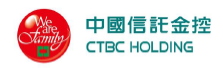

In [10]:
import base64
from io import BytesIO
from PIL import Image
from IPython.display import display

doc = fitz.open(pdf_path)
all_md = ""

page = doc[2]
text_dict = page.get_text("dict")

# 走訪所有 blocks，篩選出 type == 1 的圖片區塊
for block in text_dict["blocks"]:
    if block["type"] == 1 and "image" in block:
        img_bytes = block["image"]

        # 將 byte 字串轉換成 BytesIO 物件
        image_stream = BytesIO(img_bytes)

        # 使用 PIL 開啟圖片
        image = Image.open(image_stream)

        # 顯示圖片（僅適用於 Jupyter Notebook / IPython）
        display(image)


### 使用 fitz(dict) 將資料轉成 dict 格式查看

In [21]:
doc = fitz.open(pdf_path)
all_md = ""

page = doc[1]
text_dict = page.get_text("dict")
empty_block_num = 0
text_dict


# for idx, block in enumerate(text_dict["blocks"]):

# 	if "lines" not in block:
# 		empty_block_num += 1
# 		continue
		
		
# 	print(f'第 {idx} 段')
# 	paragraph = ""
# 	for line in block["lines"]:
# 		line_text = ""
# 		for span in line["spans"]:
# 			text = span["text"].strip()
			
			
# 			print(f'內容：{text}')
# 			print(f'字數: {len(text)}')
			
# 			size = span["size"]
# 			font = span["font"].lower()
			
# 			print(f'字串大小：{round(size, 2)}')
# 			print(f'字體：{font}')
# 			flags = span.get("flags", 0)
# 			print(f'flags: {flags}')
# 			if not text:
# 				continue

		
		# # 標題判斷（依據字體大小調整）
		# if size >= 18:
		#     text = "# " + text
		# elif size >= 14:
		#     text = "## " + text
		# elif "Bold" in font or "bold" in font:
		#     text = f"**{text}**"
# 	print('======================================')

# print(f"空白區塊數量：{empty_block_num}")

{'width': 595.3200073242188,
 'height': 841.9199829101562,
 'blocks': [{'number': 0,
   'type': 0,
   'bbox': (187.97000122070312,
    83.14999389648438,
    190.22096252441406,
    93.10999298095703),
   'lines': [{'spans': [{'size': 9.960000038146973,
       'flags': 0,
       'bidi': 0,
       'char_flags': 16,
       'font': 'Calibri',
       'color': 0,
       'alpha': 255,
       'ascender': 0.800000011920929,
       'descender': -0.20000000298023224,
       'text': ' ',
       'origin': (187.97000122070312, 90.6199951171875),
       'bbox': (187.97000122070312,
        83.14999389648438,
        190.22096252441406,
        93.10999298095703)}],
     'wmode': 0,
     'dir': (1.0, 0.0),
     'bbox': (187.97000122070312,
      83.14999389648438,
      190.22096252441406,
      93.10999298095703)}]},
  {'number': 1,
   'type': 0,
   'bbox': (70.94400024414062,
    770.1060180664062,
    302.42095947265625,
    792.3059692382812),
   'lines': [{'spans': [{'size': 9.960000038146973,
 

### 使用 pdfplumber 將「表格」轉成 md

In [62]:
# 2️⃣ 開啟 PDF 並讀取指定頁數的表格
with pdfplumber.open(pdf_path) as pdf:
    page = pdf.pages[1]  
    tables = page.extract_tables()  # 將頁面上的表格提取成 list of rows

# table
# 3️⃣ 若有表格就取出第一個表格
if tables:
    print(f'本文件有 {len(tables)} 個表格')
    table = tables[0]  # 擷取第一個表格
    
    # 移除全為空字串的列（避免 Markdown 表格多餘空列）
    cleaned_table = [row for row in table if any(cell.strip() for cell in row)]
    # 將換行符號改成空格（或你也可以用 `<br>` 保留）
    cleaned_table = [[cell.replace("\n", " ") for cell in row] for row in cleaned_table]
    
    # table[0] 是表頭欄位；table[1:] 是每一列的資料內容
    df = pd.DataFrame(cleaned_table[1:], columns=cleaned_table[0])  # 第一列作為欄位名稱
	
	# 4️⃣ 轉成 Markdown 格式並輸出
    table_md = df.to_markdown(index=False)
    print("✅ 擷取完成的 Markdown 表格：\n")
    print(table_md)
else:
    print("❌ 此頁未偵測到表格")


本文件有 1 個表格
✅ 擷取完成的 Markdown 表格：

| 制/修訂 版次   | 制/修訂 日期   | 制/修訂 說明                         | 作 者           | 備 註   |
|:---------------|:---------------|:-------------------------------------|:----------------|:--------|
| V 1.0          | 2020/12/25     | 政策制定                             | 企業永續 辦公室 |         |
| V 2.0          |                | 增、修訂集團淨零目標及實施原則等條文 | 企業永續部      |         |


### 使用 fitz(dict) 將「文本內容」轉成 md

In [ ]:
def is_number(text):
    """判斷是否為數字"""
    pattern = r'^[-+]?(\d+|\d{1,3}(,\d{3})+)?(\.\d+)?%?$'
    return bool(re.fullmatch(pattern, text.strip()))

pg_num = 2
doc = fitz.open(pdf_path)


for pg_num in range(1,2):
    page = doc[pg_num]
    text_dict = page.get_text("dict")

    header_text = ""
    page_num = 0
    all_md = ""


    for idx, block in enumerate(text_dict["blocks"]):

        if "lines" not in block:
            continue

        for line in block["lines"]:
            # 同一行文字內容
            line_text_num = len(line["spans"])
            line_text = ""
            line_font = ""
            # print(f'共有 {line_text_num} 個 span(段)')


            for idy, span in enumerate(line["spans"]):
            
                    
                text = span["text"].strip()
                size = span["size"]
                font = span["font"].lower()
                
                # # 擷取表頭
                # if idx == 1 and not header_text and size < 12:
                # 	header_text = text
                # 	all_md += f"Header：{header_text}\n"
                # # 擷取頁碼
                # if idx == 2 and not page_num and size < 12:
                # 	page_num = text
                # 	all_md += f"Page_Number：{page_num}\n\n"

                if idx == 1:
                    if type(text) != str and size < 12:
                        page_num = text
                        all_md += f"Page_Number：{page_num}\n"
                    elif type(text) == str and size < 12:
                        header_text = text
                        all_md += f"Header：{header_text}\n"
                    
                elif idx == 2:
                    if type(text) != str and size < 12:
                        page_num = text
                        all_md += f"Page_Number：{page_num}\n"

                line_text += text
                line_font += font

                if not text:
                    continue
                

            if line_text != "":
                # 標題判斷（依據字體大小調整）
                if size >= 25:
                    line_text = "# " + line_text + "\n"
                elif size >= 15 and size < 25:
                    line_text = "## " + line_text + "\n"
                elif size >= 13 and size < 15:
                    line_text = "### " + line_text + "\n"
                elif "bold" in line_font:
                    line_text = f"\n**{line_text}**" + "\n"


        if line_text != None and line_text.strip():
            # size = round(size, 2)
            # print(f'第 {idx} 段')
            # print(f'內容：{repr(line_text)}')
            # print(f'字串大小：{size}')
            # print(f'字體：{line_font}')
            # print('======================================')
        
            if line_text != header_text and line_text != page_num:
                all_md += line_text
        
    all_md += "\n\n---\n"
    print(all_md)
    # print(f"表頭文字：{header_text}")
    # print(f"頁碼：{page_num}")

<class 'str'>
1## 中國信託金融控股股份有限公司
## 稅務治理政策
## 文件制定/修訂履歷

**備註**
107年4月27日第6屆第27次董事會109/6/24因應全球反避稅趨勢，增修相關規定。109年6月24日第7屆第19次董事會110/5/21為強化集團之稅務管理，增修相關規定。110年5月21日第7屆第33次董事會

---



In [73]:
import pdfplumber

def convert_table_to_markdown(table):
    # 處理表頭：去掉換行並去除左右空白
    header = [cell.replace('\n', ' ').strip() if cell else "" for cell in table[0]]
    
    # 處理內容列，去掉換行與左右空白
    rows = []
    for row in table[1:]:
        cleaned_row = [cell.replace('\n', ' ').strip() if cell else "" for cell in row]
        # 排除空白列
        if any(cell.strip() for cell in cleaned_row):
            rows.append(cleaned_row)

    # 組合 Markdown 表格
    md = []
    md.append("| " + " | ".join(header) + " |")
    md.append("|" + "|".join([":" + "-"*(len(h)+1) for h in header]) + "|")
    for row in rows:
        md.append("| " + " | ".join(row) + " |")

    return "\n".join(md)

def extract_table_markdown(pdf_path):
    output = []
    with pdfplumber.open(pdf_path) as pdf:
        for i, page in enumerate(pdf.pages):
            tables = page.extract_tables()
            if tables:
                page_num = i + 1

                # 嘗試抓 header 第一行
                text_lines = page.extract_text().splitlines() if page.extract_text() else []
                header_line = text_lines[0].strip() if text_lines else "（無法讀取）"

                # 使用第一個表格（如需支援多表可擴充）
                markdown_table = convert_table_to_markdown(tables[0])

                # 手動指定表格標題
                title = "## 文件制/修訂履歷"

                result = f"""Header：{header_line}
Page_Number：{page_num}

{title}
{markdown_table}

---
"""
                output.append(result)
    return output

# 執行
md_output = extract_table_markdown(pdf_path)

# 顯示結果
for md in md_output:
    print(md)


Header：文件等級：公開
Page_Number：2

## 文件制/修訂履歷
| 制/修訂 版次 | 制/修訂 日期 | 制/修訂 說明 | 作 者 | 備 註 |
|:--------|:--------|:--------|:----|:----|
| V 1.0 | 2020/12/25 | 政策制定 | 企業永續 辦公室 |  |
| V 2.0 |  | 增、修訂集團淨零目標及實施原則等條文 | 企業永續部 |  |

---



## 專門整理文本與表格文件

In [7]:
def convert_table_to_markdown(table):
    header = [cell.replace('\n', ' ').strip() if cell else "" for cell in table[0]]
    rows = []
    for row in table[1:]:
        cleaned_row = [cell.replace('\n', ' ').strip() if cell else "" for cell in row]
        if any(cell.strip() for cell in cleaned_row):
            rows.append(cleaned_row)

    md = []
    md.append("| " + " | ".join(header) + " |")
    md.append("|" + "|".join([":" + "-"*(len(h)+1) for h in header]) + "|")
    for row in rows:
        md.append("| " + " | ".join(row) + " |")

    return "\n".join(md)

def process_pdf_text_and_tables(pdf_path):
    doc = fitz.open(pdf_path)
    plumber_pdf = pdfplumber.open(pdf_path)
    total_pages = len(doc)
    all_output_md = ""  # 最後存成一整個 Markdown 文件

    for pg_num in range(total_pages):
        page = doc[pg_num]
        text_dict = page.get_text("dict")

        header_text = ""
        page_number_text = ""
        page_md = ""
        
        plumber_page = plumber_pdf.pages[pg_num]
        tables = plumber_page.extract_tables()
        if not tables:
            for idx, block in enumerate(text_dict["blocks"]):
                if "lines" not in block:
                    continue
            
                for line in block["lines"]:
                    line_text = ""
                    line_font = ""
                    size = 0

                    for span in line["spans"]:
                        text = span["text"].strip()
                        size = span["size"]
                        font = span["font"].lower()

                        if idx == 1 and not header_text and size < 12:
                            header_text = text
                            page_md += f"Header：{header_text}\n"
                        if idx == 2 and not page_number_text and size < 12:
                            page_number_text = text
                            page_md += f"Page_Number：{page_number_text}\n\n"

                        line_text += text
                        line_font += font

                    if line_text.strip():
                        if size >= 25:
                            line_text = "# " + line_text + "\n"
                        elif 15 <= size < 25:
                            line_text = "## " + line_text + "\n"
                        elif 13 <= size < 15:
                            line_text = "### " + line_text + "\n"
                        elif "bold" in line_font:
                            line_text = f"\n**{line_text}**\n"

                    if line_text.strip() and line_text != header_text and line_text != page_number_text:
                        page_md += line_text

        # 表格處理
        else:
            for idx, block in enumerate(text_dict["blocks"]):
                if "lines" not in block:
                    continue
            
                for line in block["lines"]:
                    line_text = ""
                    line_font = ""
                    size = 0

                    for span in line["spans"]:
                        text = span["text"].strip()
                        size = span["size"]
                        font = span["font"].lower()

                        if idx == 1 and not header_text and size < 12:
                            header_text = text
                            page_md += f"Header：{header_text}\n"
                        if idx == 2 and not page_number_text and size < 12:
                            page_number_text = text
                            page_md += f"Page_Number：{page_number_text}\n\n"

                        line_text += text
                        line_font += font

                    if line_text.strip():
                        if size >= 25:
                            line_text = "# " + line_text + "\n"
                        elif 15 <= size < 25:
                            line_text = "## " + line_text + "\n"
                        elif 13 <= size < 15:
                            line_text = "### " + line_text + "\n"
                        elif "bold" in line_font:
                            line_text = f"\n**{line_text}**\n"

                    if line_text.strip() and line_text != header_text and line_text != page_number_text and size > 12:
                        page_md += line_text
            
            
            # 製作表格
            markdown_table = convert_table_to_markdown(tables[0])
            # page_md += "\n## 文件制/修訂履歷\n"
            page_md += "\n" + markdown_table + "\n"

        page_md += "\n\n---\n\n"
        all_output_md += page_md

    # 寫入 .md 檔案
    with open(output_path + file_name + "_test1.md", "w", encoding="utf-8") as f:
    # with open(final_output_path + file_name + "_final.md", "w", encoding="utf-8") as f:
        f.write(all_output_md)

    print(f"✅ Markdown 檔案已儲存至：{final_output_path + file_name}_test1.md")
    # print(f"✅ Markdown 檔案已儲存至：{final_output_path + file_name}_final.md")

# 執行主程式
process_pdf_text_and_tables(pdf_path)


✅ Markdown 檔案已儲存至：PDF_To_Markdown_OutputFile\PyMuPDF4LLM\markdown\final\20250728_稅務治理政策_test1.md


In [3]:
print(f"✅ Markdown 檔案已儲存至：{final_output_path + file_name}_final.md")

✅ Markdown 檔案已儲存至：PDF_To_Markdown_OutputFile\PyMuPDF4LLM\markdown\final\20250728_永續金融政策_final.md
